<h1> Abstract </h1>

In the following code we will work to replicate various figures from the *Dissecting racial bias in an algorithm used to manage the health of populations* and use data analysis to try and validate some of the studies results. The first graphic we will reproduce will break down the relationship a predicted risk score has with # of chronic illness for a given gender and race. This graph will give us insight into whether the risk algorithm has any biases for a given race or gender. The second graphic we will recreate is a comparison of medical expenditure and risk scores/ number of chronic illnesses between black and white patients. Using these graphs we will ascertain whether or not there exists a price disparity between races and in the final section we will quantify how large of a disparity there may or may not be.

<h1> Part A: Data Access

In [40]:
#Import necessary libraries and downloads our data set
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)
df.head()

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,0,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,1,0,0,1,0,0,1,4,3
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,0,0,1,1


<h1> Part B: Reproduce Fig. 1

In [41]:
#Separates our data set into male and female patients
men = df[df["dem_female"] == 0]
women = df[df["dem_female"] == 1]

In [42]:
#Normalizes the risk scores for both men and women into percentile risk
men["percentile risk"] = men["risk_score_t"].rank(pct = True) * 100
men["percentile risk"] = men["percentile risk"].round()
women["percentile risk"] = women["risk_score_t"].rank(pct = True) * 100
women["percentile risk"] = women["percentile risk"].round()

/var/folders/bh/dckst2q54p57m_p499z1mdz80000gn/T/ipykernel_38310/707116237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men["percentile risk"] = men["risk_score_t"].rank(pct = True) * 100
/var/folders/bh/dckst2q54p57m_p499z1mdz80000gn/T/ipykernel_38310/707116237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men["percentile risk"] = men["percentile risk"].round()
/var/folders/bh/dckst2q54p57m_p499z1mdz80000gn/T/ipykernel_38310/707116237.py:4: SettingWithCopyWarning: 
A value is trying to be set 

[Text(0.5, 0, 'Mean Number of Chronic Illnesses'),
 Text(0, 0.5, 'Percentile Risk Score'),
 Text(0.5, 1.0, 'Female')]

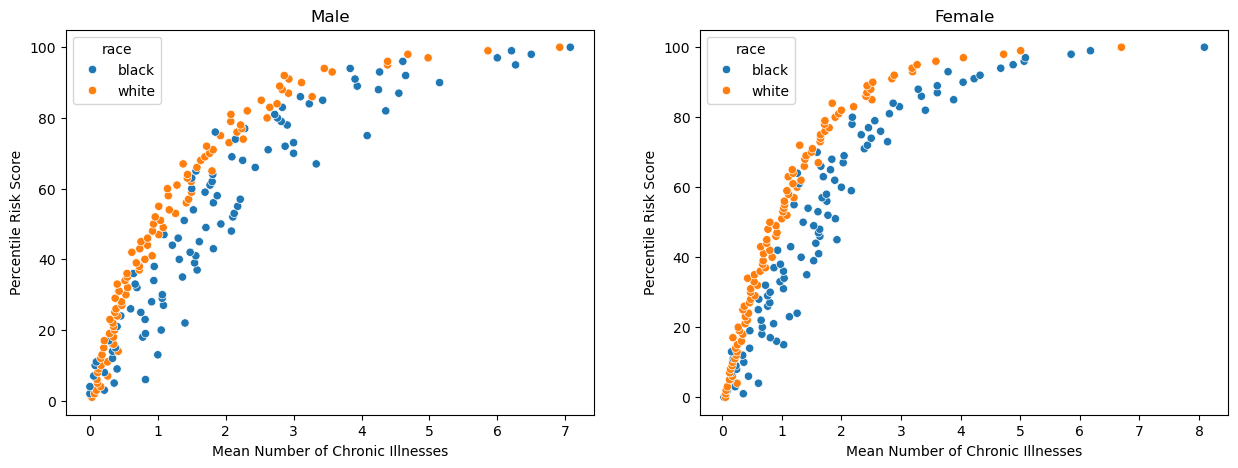

In [43]:
#Groups our data by percentile risk and race, then finds the mean number of chronic illnesses
male_data = men.groupby(["percentile risk", "race"]).aggregate({"gagne_sum_t" : "mean"})
female_data = women.groupby(["percentile risk", "race"]).aggregate({"gagne_sum_t" : "mean"})

#Plots our data
fig, ax = plt.subplots(1,2, figsize = (15, 5))
p1 = sns.scatterplot(data=male_data, y = "percentile risk", x = "gagne_sum_t", hue="race", ax=ax[0])
p1.set(xlabel ="Mean Number of Chronic Illnesses", ylabel = "Percentile Risk Score", title ='Male')
p2 = sns.scatterplot(data=female_data, y = "percentile risk", x = "gagne_sum_t", hue="race", ax=ax[1])
p2.set(xlabel ="Mean Number of Chronic Illnesses", ylabel = "Percentile Risk Score", title ='Female')

Suppose that Patient A is Black, that Patient B is White, and that both Patient A and Patient B have exactly the same chronic illnesses. Are Patient A and Patient B equally likely to be referred to the high-risk care management program?

- No, on average patient B, the white patient is more likely to be referred to a high-risk care management program. The disparity between risk scores is most apparent in the lower numbers of chronic illnesses where white patients are in a significantly higher risk percentile. However, as the mean number of chronic illnesses increases the disparity in percentile risk scores decreases.

<h1> Part C: Reproduce Fig. 3

[Text(0, 0.5, ''), Text(0.5, 0, 'Number of Chronic Illnesses')]

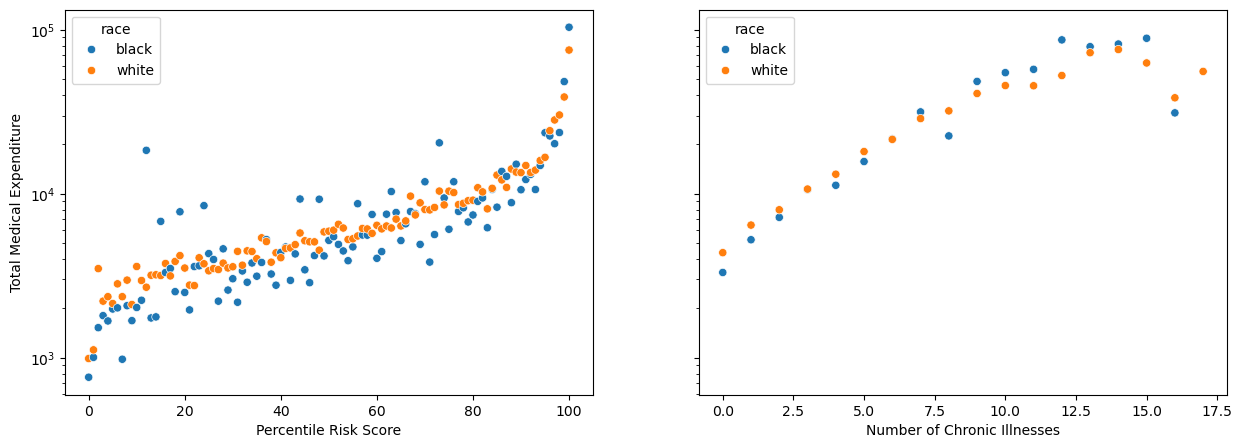

In [76]:

#Normalizes the risk scores into percentile risk
df["percentile risk"] = df["risk_score_t"].rank(pct = True) * 100
df["percentile risk"] = df["percentile risk"].round()

#Groups our data by percentile risk and race, then finds the mean expenditure
data = df.groupby(["percentile risk", "race"]).aggregate({"cost_t" : "mean"})
#Groups our data by total number of chronic illnesses and race, then finds the mean expenditure
data1 = df.groupby(["gagne_sum_t", "race"]).aggregate({"cost_t" : "mean"})

#Plots our data
fig, ax = plt.subplots(1,2, figsize = (15, 5), sharey = True,)
p3 = sns.scatterplot(data=data, x = "percentile risk", y = "cost_t", hue="race", ax=ax[0])
p3.set(ylabel ="Total Medical Expenditure", xlabel = "Percentile Risk Score", yscale="log")
p4 = sns.scatterplot(data=data1, x = "gagne_sum_t", y = "cost_t", hue="race", ax=ax[1])
p4.set(ylabel ="", xlabel = "Number of Chronic Illnesses")

It seems like on average black patients have lower medical expenditure that their white counterparts with in a given risk score percentile. However, it seems like as you approach the extreme ends of our decile, the disparity shrinks. The chart on the right is a little more confusing. It seems logical that as you have more chronic illnesses you will have higher medical expenditures, however, after around 13 chronic illnesses it seems like the cost goes down. I wonder whether this is cause by a lack of data on the tail end so our data is slightly skewed by a few individuals. Also, it seems like much of the medical expenditure disparities that we see in the first chart are not present when we compare the cost to # of chronic illnesses.

<h1> Part D: Modeling Cost Disparity

Data Preparation:

In [45]:
# Percent of people in data set with < 6 chronic illnesses
perc_less_six = df[df["gagne_sum_t"] < 6].shape[0] / df.shape[0]
perc_six_data = df[df["gagne_sum_t"] < 6]
#Creates a new column of the data set which is just the logarithm of the cost
perc_six_data = perc_six_data[perc_six_data["cost_t"] > 0]
perc_six_data["log_price"] = np.log(perc_six_data["cost_t"])
# Creates a column for the qualitative race variable: 0 = white, 1 = Black.
perc_six_data["quant_race"] = pd.get_dummies(perc_six_data["race"])["black"]
perc_six_data["quant_race"].value_counts()
#Separate data into predictor variables [race, # chronic conditions], target variable y (the log-cost)
X_train = perc_six_data[["quant_race", "gagne_sum_t"]]
y_train = perc_six_data["log_price"]


Modeling:

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Constructs data sets with polynomial features of various size
def add_polynomial_features(X, degree):
  X_ = X.copy()
  for j in range(1, degree):
    X_[f"poly_{j}"] = X_["gagne_sum_t"]**j
  return X_

#Shows degree 6 is best, everything after does just as well however the higher the degree the more complex the math will become
for i in range(10):
  temp = add_polynomial_features(X_train, i)
  LR = LinearRegression()
  cv_scores_LR = cross_val_score(LR, temp, y_train, cv=5)
  print(cv_scores_LR)


[0.07906298 0.0841587  0.08868864 0.0881431  0.08709964]
[0.07906298 0.0841587  0.08868864 0.0881431  0.08709964]
[0.07906298 0.0841587  0.08868864 0.0881431  0.08709964]
[0.08029865 0.08498736 0.08879388 0.08907137 0.0879535 ]
[0.08075755 0.08488526 0.08963978 0.09065718 0.08911137]
[0.08113733 0.08565834 0.08984305 0.0906711  0.08953255]
[0.0813977  0.08622709 0.08987886 0.09135492 0.08991925]
[0.0813977  0.08622709 0.08987886 0.09135492 0.08991925]
[0.0813977  0.08622709 0.08987886 0.09135492 0.08991925]
[0.0813977  0.08622709 0.08987886 0.09135492 0.08991925]


In [77]:
LR = LinearRegression()
LR.fit(add_polynomial_features(X_train, 6), y_train)
print("Incurred costs for Black patients are", np.exp(LR.coef_)[0]*100, "percent of their white counterparts")


Incurred costs for Black patients are 75.3732233163919 percent of their white counterparts


This finding by itself does not prove Obermeyer's entire paper, however it does support his claim "that we spend less money caring for Black patients than for white patients". The analysis performed above does not prove or speak to whether this disparity is caused by unequal access or whether the algorithm actually predicts health care cost rather than illness.

<h1> Part E: Discussion

In this blog post we have successfully recreated figure one and three of Obermeyer's study and have discovered two main findings. First, for two patients, one who is black and the other who is white, to have similar risk scores, the black patient on average much have a significantly higher number of chronic illnesses than their white counterpart. The second main finding of our analysis is that their is a financial disparity between black and white patients with in a certain risk bracket. The incurred costs for Black patients is 75.4% of their white counterparts. The author of the paper we are replicating claims this is due to unequal access to care and using external knowledge I am inclined to agree with him. However, for the sake of recreating his findings, we must clarify that we did not find any link in our data that would back up this claim (this is not saying it is a false claim, but rather it is a disclaimer).

The algorithm does not seem to satisfy independence since as we stated above black patients on average much have a significantly higher number of chronic illnesses than their white counterpart. We do not really explore the other two standards, separation and sufficiency, in this blog post however if we had to give a prediction, we would conjecture to say separation is not satisfied, but sufficiency is, since it is more defined by the creators of the algorithm.